In [33]:
# 观察一下数据集
from IPython.display import display

import os, json
import pandas as pd

# os.chdir(os.path.dirname(os.getcwd()))

def load_jsonl(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return [json.loads(line) for line in f]

import base64
from io import BytesIO
from PIL import Image
def base64toimage(base64_str):
    img_data = base64.b64decode(base64_str)
    img = Image.open(BytesIO(img_data))
    return img

In [38]:
data_dir = os.path.join(os.getcwd(), 'data', 'Flickr30k-CN')
    
dev_images = pd.read_csv(os.path.join(data_dir, 'valid_imgs.tsv'), 
                         sep='\t', header=None, names=['image_ids', 'base64'])
dev_texts = load_jsonl(os.path.join(data_dir, 'valid_texts.jsonl'))

In [39]:
dev_images.shape, len(dev_texts)

((1000, 2), 5000)

{'image_ids': [1077546505],
 'text': '一个穿着蓝色游泳裤的男孩在水里滑了一个黄色的幻灯片，在水里漂浮着充气玩具。',
 'text_id': 148920}
text='一个穿着蓝色游泳裤的男孩在水里滑了一个黄色的幻灯片，在水里漂浮着充气玩具。'


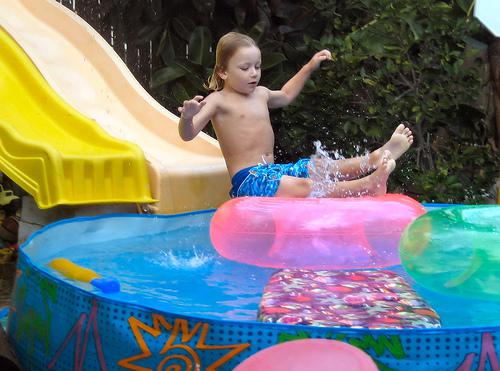

In [71]:
from pprint import pprint
idx = 5

sample = dev_texts[idx]
text = sample['text']
image_ids = sample['image_ids'][0]

image_base64 = dev_images.loc[dev_images['image_ids']==image_ids, "base64"].values[0]
img = base64toimage(image_base64)

pprint(sample)
print(f'{text=}')
display(img)

In [57]:
# 数据集中的images_ids都是长度为1的list
tmp = []
for item in dev_texts:
    tmp.append(len(item['image_ids']))
print(min(tmp), max(tmp))

1 1
